In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
%matplotlib inline

In [84]:
df=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data",sep=" ",header=None)
headers=["Status of existing checking account","Duration in month","Credit history",\
         "Purpose","Credit amount","Savings account/bonds","Present employment since",\
         "Installment rate in percentage of disposable income","Personal status and sex",\
         "Other debtors / guarantors","Present residence since","Property","Age in years",\
        "Other installment plans","Housing","Number of existing credits at this bank",\
        "Job","Number of people being liable to provide maintenance for","Telephone","foreign worker","Cost Matrix(Risk)"]
df.columns=headers
df.to_csv("german_data_credit_cat.csv",index=False) 

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status of existing checking account                       1000 non-null   object
 1   Duration in month                                         1000 non-null   int64 
 2   Credit history                                            1000 non-null   object
 3   Purpose                                                   1000 non-null   object
 4   Credit amount                                             1000 non-null   int64 
 5   Savings account/bonds                                     1000 non-null   object
 6   Present employment since                                  1000 non-null   object
 7   Installment rate in percentage of disposable income       1000 non-null   int64 
 8   Personal status and sex      

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status of existing checking account                       1000 non-null   object
 1   Duration in month                                         1000 non-null   int64 
 2   Credit history                                            1000 non-null   object
 3   Purpose                                                   1000 non-null   object
 4   Credit amount                                             1000 non-null   int64 
 5   Savings account/bonds                                     1000 non-null   object
 6   Present employment since                                  1000 non-null   object
 7   Installment rate in percentage of disposable income       1000 non-null   int64 
 8   Personal status and sex      

In [6]:
df.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Cost Matrix(Risk)
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [74]:
Status_of_existing_checking_account={'A14':"no checking account",'A11':"<0 DM", 'A12': "0 <= <200 DM",'A13':">= 200 DM "}
df["Status of existing checking account"]=df["Status of existing checking account"].map(Status_of_existing_checking_account)

Credit_history={"A34":"critical account","A33":"delay in paying off","A32":"existing credits paid back duly till now","A31":"all credits at this bank paid back duly","A30":"no credits taken"}
df["Credit history"]=df["Credit history"].map(Credit_history)

Purpose={"A40" : "car (new)", "A41" : "car (used)", "A42" : "furniture/equipment", "A43" :"radio/television" , "A44" : "domestic appliances", "A45" : "repairs", "A46" : "education", 'A47' : 'vacation','A48' : 'retraining','A49' : 'business','A410' : 'others'}
df["Purpose"]=df["Purpose"].map(Purpose)

Saving_account={"A65" : "no savings account","A61" :"<100 DM","A62" : "100 <= <500 DM","A63" :"500 <= < 1000 DM", "A64" :">= 1000 DM"}
df["Savings account/bonds"]=df["Savings account/bonds"].map(Saving_account)

Present_employment={'A75':">=7 years", 'A74':"4<= <7 years",  'A73':"1<= < 4 years", 'A72':"<1 years",'A71':"unemployed"}
df["Present employment since"]=df["Present employment since"].map(Present_employment)



Personal_status_and_sex={ 'A95':"female:single",'A94':"male:married/widowed",'A93':"male:single", 'A92':"female:divorced/separated/married", 'A91':"male:divorced/separated"}
df["Personal status and sex"]=df["Personal status and sex"].map(Personal_status_and_sex)


Other_debtors_guarantors={'A101':"none", 'A102':"co-applicant", 'A103':"guarantor"}
df["Other debtors / guarantors"]=df["Other debtors / guarantors"].map(Other_debtors_guarantors)


Property={'A121':"real estate", 'A122':"savings agreement/life insurance", 'A123':"car or other", 'A124':"unknown / no property"}
df["Property"]=df["Property"].map(Property)




Other_installment_plans={'A143':"none", 'A142':"store", 'A141':"bank"}
df["Other installment plans"]=df["Other installment plans"].map(Other_installment_plans)

Housing={'A153':"for free", 'A152':"own", 'A151':"rent"}
df["Housing"]=df["Housing"].map(Housing)




Job={'A174':"management/ highly qualified employee", 'A173':"skilled employee / official", 'A172':"unskilled - resident", 'A171':"unemployed/ unskilled  - non-resident"}
df["Job"]=df["Job"].map(Job)

Telephone={'A192':"yes", 'A191':"none"}
df["Telephone"]=df["Telephone"].map(Telephone)



foreign_worker={'A201':"yes", 'A202':"no"}
df["foreign worker"]=df["foreign worker"].map(foreign_worker)



risk={1:"Good Risk", 2:"Bad Risk"}
df["Cost Matrix(Risk)"]=df["Cost Matrix(Risk)"].map(risk)

In [7]:
df.describe()

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Cost Matrix(Risk)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [75]:
df.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Cost Matrix(Risk),age > 25
0,<0 DM,6,critical account,radio/television,1169,no savings account,>=7 years,4,male:single,none,...,67,none,own,2,skilled employee / official,1,yes,yes,Good Risk,1
1,0 <= <200 DM,48,existing credits paid back duly till now,radio/television,5951,<100 DM,1<= < 4 years,2,female:divorced/separated/married,none,...,22,none,own,1,skilled employee / official,1,none,yes,Bad Risk,0
2,no checking account,12,critical account,education,2096,<100 DM,4<= <7 years,2,male:single,none,...,49,none,own,1,unskilled - resident,2,none,yes,Good Risk,1
3,<0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,<100 DM,4<= <7 years,2,male:single,guarantor,...,45,none,for free,1,skilled employee / official,2,none,yes,Good Risk,1
4,<0 DM,24,delay in paying off,car (new),4870,<100 DM,1<= < 4 years,3,male:single,none,...,53,none,for free,2,skilled employee / official,2,none,yes,Bad Risk,1


In [8]:
df.isna().sum()

# no missing value in this dataset

Status of existing checking account                         0
Duration in month                                           0
Credit history                                              0
Purpose                                                     0
Credit amount                                               0
Savings account/bonds                                       0
Present employment since                                    0
Installment rate in percentage of disposable income         0
Personal status and sex                                     0
Other debtors / guarantors                                  0
Present residence since                                     0
Property                                                    0
Age in years                                                0
Other installment plans                                     0
Housing                                                     0
Number of existing credits at this bank                     0
Job     

In [9]:
for i in list(df.columns):
    print(i,df[df[i]=='?'][i].count())

Status of existing checking account 0
Duration in month 0
Credit history 0
Purpose 0
Credit amount 0
Savings account/bonds 0
Present employment since 0
Installment rate in percentage of disposable income 0
Personal status and sex 0
Other debtors / guarantors 0
Present residence since 0
Property 0
Age in years 0
Other installment plans 0
Housing 0
Number of existing credits at this bank 0
Job 0
Number of people being liable to provide maintenance for 0
Telephone 0
foreign worker 0
Cost Matrix(Risk) 0


C:\Users\LiangRui\Miniconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [10]:
df['Cost Matrix(Risk)'].value_counts()

1    700
2    300
Name: Cost Matrix(Risk), dtype: int64

In [76]:
cols_df = pd.DataFrame(df.dtypes)
num_cols = list(cols_df[cols_df[0]=='int64'].index)
cat_cols = list(cols_df[cols_df[0]=='object'].index)[:-1] #excluding target column of income 
print('Numeric variables includes:','\n',num_cols)
print('\n')
print('Categorical variables includes','\n',cat_cols) 

Numeric variables includes: 
 ['Duration in month', 'Credit amount', 'Installment rate in percentage of disposable income', 'Present residence since', 'Age in years', 'Number of existing credits at this bank', 'Number of people being liable to provide maintenance for', 'age > 25']


Categorical variables includes 
 ['Status of existing checking account', 'Credit history', 'Purpose', 'Savings account/bonds', 'Present employment since', 'Personal status and sex', 'Other debtors / guarantors', 'Property', 'Other installment plans', 'Housing', 'Job', 'Telephone', 'foreign worker']


In [20]:
df['Age in years'][df['Age in years'] <= 25].value_counts().sum()

190

In [19]:
df['Age in years'][df['Age in years'] > 25].value_counts().sum()

810

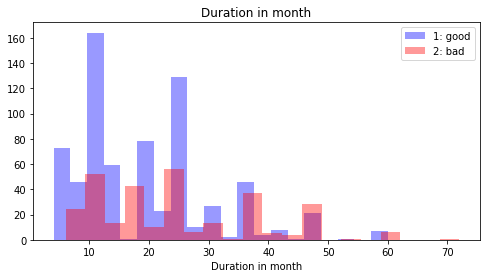

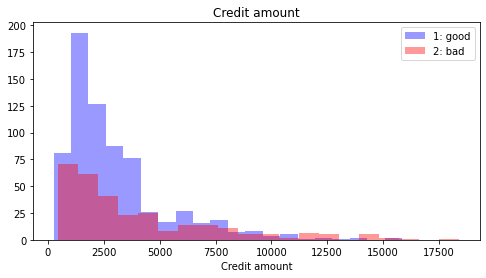

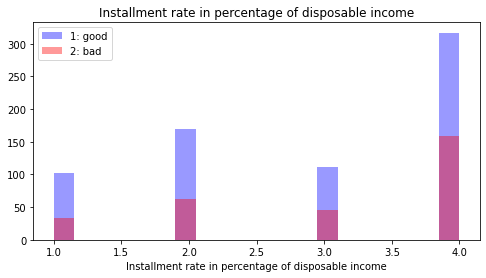

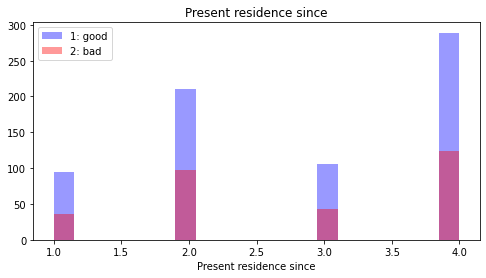

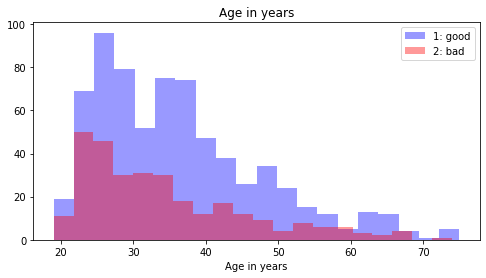

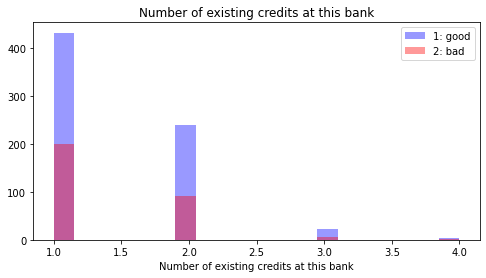

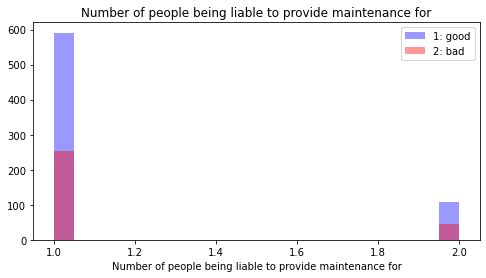

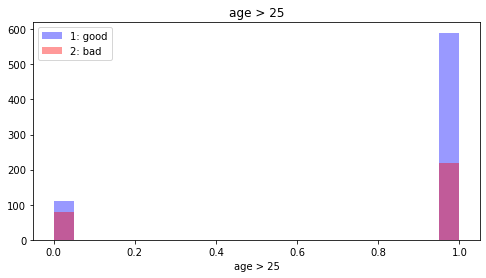

In [83]:
for i in num_cols:
    fig = plt.figure(figsize=(8,4))
    sns.distplot(df[df['Cost Matrix(Risk)']== 'Good Risk'][i], bins=20, kde=False, color='b',label='1: good')
    sns.distplot(df[df['Cost Matrix(Risk)']== 'Bad Risk'][i], bins=20, kde=False, color='r', label='2: bad')
    plt.title(i)
    plt.legend()
    plt.show()
    #fig.savefig("{i}.png".format(i=i))
    #plt.close()

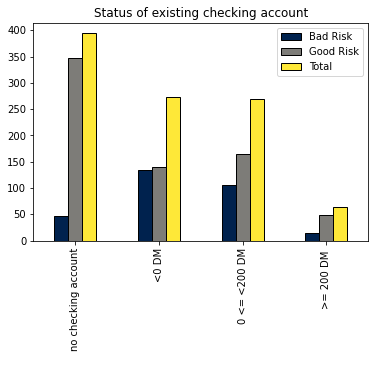

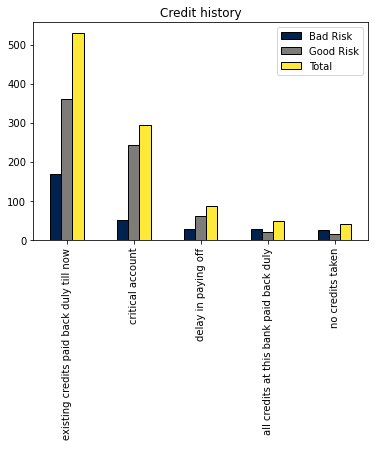

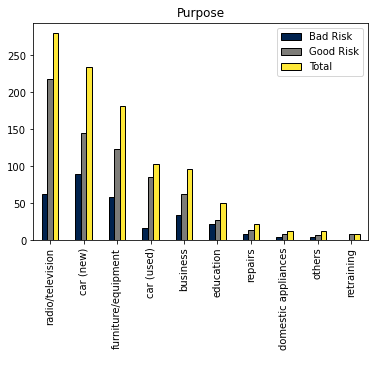

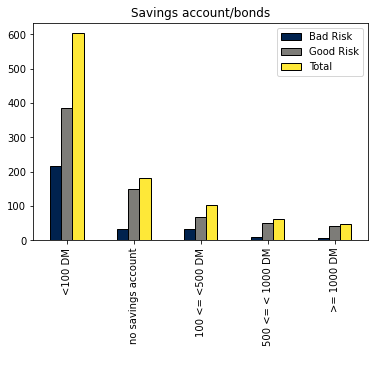

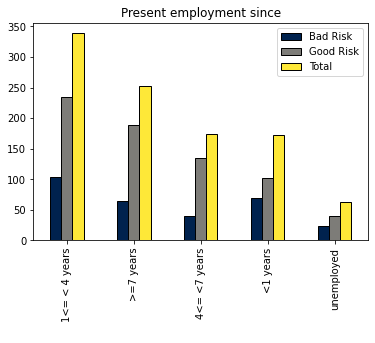

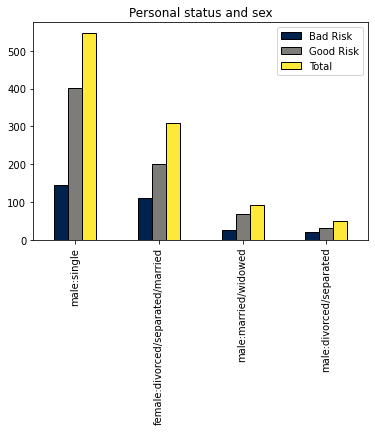

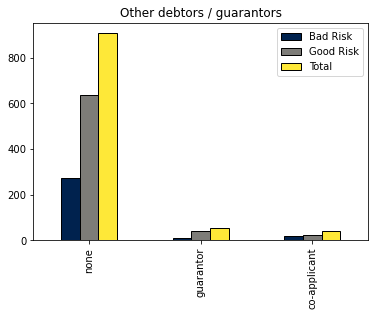

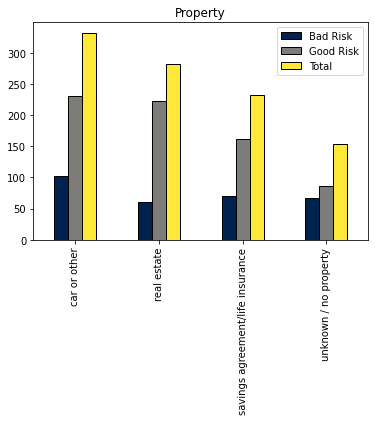

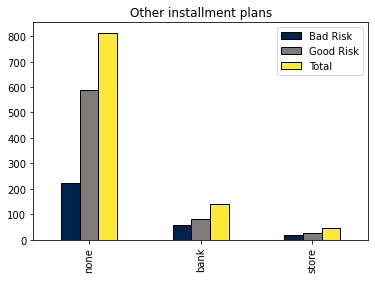

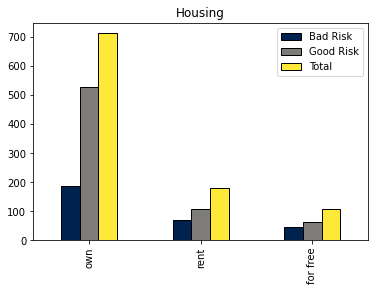

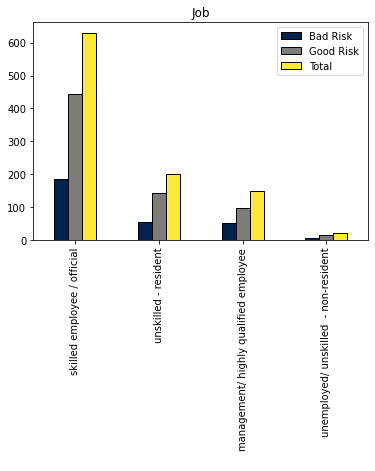

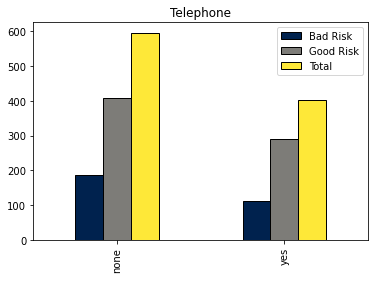

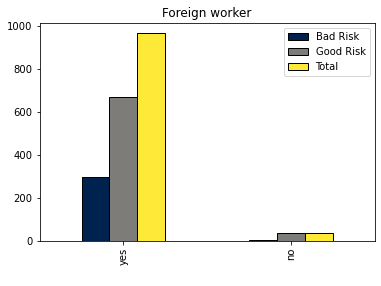

In [82]:

for i in cat_cols:
    ct = pd.crosstab(df[i],df['Cost Matrix(Risk)'],margins=True, margins_name="Total")
    ct.drop(labels='Total',axis=0,inplace=True) #Removing subtotal row 
    ct.sort_values(by='Total',ascending=False,inplace=True) #Sorting based on total column
    # plotting
    ct.plot(kind='bar',colormap='cividis',edgecolor='black')  
    plt.xlabel(' ')
    plt.title(str(i).capitalize())
    plt.legend(loc=1)
    
    plt.show()


In [34]:
df['Age in years'].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age in years, dtype: float64

In [35]:
df_u25 = df[df['Age in years'] <= 25 ]
df_o25 = df[df['Age in years'] > 25 ]

In [39]:
df_u25['Cost Matrix(Risk)'].value_counts()

1    110
2     80
Name: Cost Matrix(Risk), dtype: int64

In [40]:
df_o25['Cost Matrix(Risk)'].value_counts()

1    590
2    220
Name: Cost Matrix(Risk), dtype: int64

In [43]:
def visualize_distribution(attr):
    good_risk_df = df[df["Cost Matrix(Risk)"]== 1]
    bad_risk_df = df[df["Cost Matrix(Risk)"]== 2]
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    attr_good_risk_df = good_risk_df[[attr, 'Cost Matrix(Risk)']].groupby(attr).count()
    attr_bad_risk_df = bad_risk_df[[attr, 'Cost Matrix(Risk)']].groupby(attr).count()
    ax[0].barh( attr_good_risk_df['Cost Matrix(Risk)'].index.tolist(), attr_good_risk_df['Cost Matrix(Risk)'].tolist(), align='center', color="b")
    ax[1].barh( attr_bad_risk_df['Cost Matrix(Risk)'].index.tolist(), attr_bad_risk_df['Cost Matrix(Risk)'].tolist(), align='center', color="r")
    ax[0].set_title('Good Risk')
    ax[1].set_title('Bad Risk')
    ax[0].invert_xaxis()
    ax[1].yaxis.tick_right()
    
    plt.suptitle(attr)
    plt.tight_layout()
    plt.show()

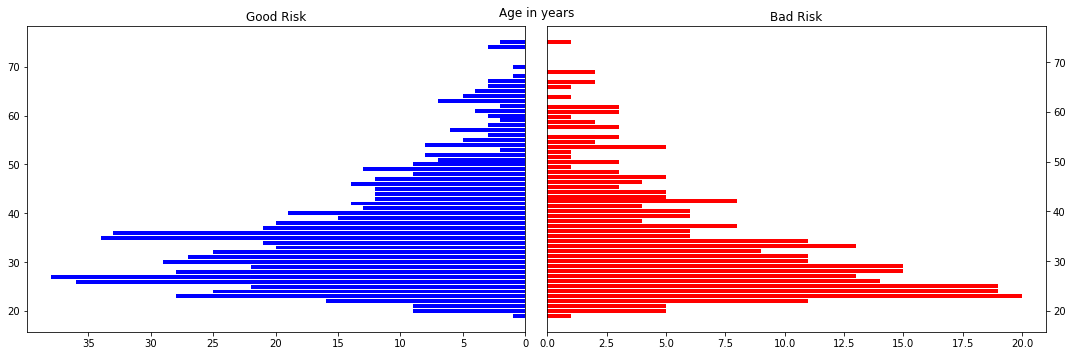

In [44]:
visualize_distribution('Age in years')

In [53]:
df['age > 25'] = np.NaN

In [54]:
df['age > 25'] [df['Age in years'] > 25] = 1

C:\Users\LiangRui\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
df['age > 25'] [df['Age in years'] <= 25] = 0

C:\Users\LiangRui\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


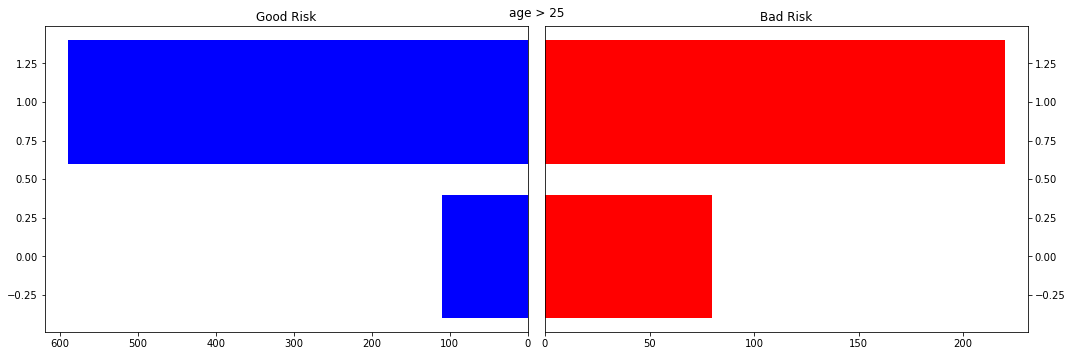

In [57]:
visualize_distribution('age > 25')